# Import Data and Load Data

In [ ]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split

# Search CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# menampilkan semua kolom
pd.set_option('display.max_columns', None)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# load data
df_final = pd.read_csv('data_2.csv')

In [ ]:
# load data
#df_final = pd.read_csv('/content/drive/MyDrive/Project Data Science Academy/Dataset/data_2.csv')

# Feature Selection

In [ ]:
df_final.corr()

,promo_amount,shipment_fee,total_amount,customer_age,total_promo_amount,total_shipment_fee,promo_usage_count,transaction_amount,total_money_spent,gender_F,gender_M,device_type_Android,device_type_iOS,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,payment_status_Failed,payment_status_Success,promo_code_AZ2022,promo_code_BUYMORE,promo_code_LIBURDONG,promo_code_NONE,promo_code_SC2022,promo_code_STARTUP,promo_code_WEEKENDMANTAP,promo_code_WEEKENDSERU,promo_code_XX2022,event_name_BOOKING,event_name_CLICK,event_name_HOMEPAGE,event_name_ITEM_DETAIL,event_name_PROMO_PAGE,event_name_SCROLL,event_name_SEARCH,traffic_source_MOBILE,traffic_source_WEB,class_age_adults,class_age_child,class_age_elderly,class_age_teenager,is_loyal
promo_amount,1.000000,0.002263,-0.006809,-0.012126,0.114504,0.030990,0.082432,0.024965,0.028954,0.005877,-0.000626,-0.000876,0.005233,-0.000510,0.001127,0.003171,0.000602,0.008944,-0.000574,-0.000381,0.315130,0.267961,0.157166,-0.815398,0.284282,0.278976,0.156701,0.277351,0.219876,0.019393,-0.009038,-0.001943,-0.013693,9.546899e-03,-0.007288,-0.004572,0.001844,0.001676,-0.004798,4.031705e-03,0.002549,0.010128,-0.031880
shipment_fee,0.002263,1.000000,0.013150,-0.004814,0.004309,0.041155,0.006385,0.003658,0.001413,-0.004073,0.008057,0.003228,-0.000378,-0.001872,0.006557,0.007101,-0.003142,-0.002243,-0.005226,0.003084,0.007061,0.004625,-0.005054,-0.004544,-0.003652,-0.004156,0.003108,0.002755,0.004201,-0.003944,0.007711,0.000828,-0.001027,-7.396620e-04,0.000289,0.002580,0.003065,0.000336,0.003518,2.243706e-04,0.002473,0.002523,-0.002580
total_amount,-0.006809,0.013150,1.000000,-0.009625,0.000351,0.001464,0.003254,0.003545,0.055462,-0.001962,-0.003493,-0.002243,-0.003410,-0.005393,-0.003843,-0.003752,0.008953,-0.002421,-0.000385,-0.002123,-0.009074,-0.003048,0.004087,0.000421,0.002375,-0.003482,0.000433,-0.000400,-0.006467,0.004922,-0.001340,-0.002069,-0.010961,-1.615566e-03,0.003164,-0.003658,-0.003591,0.001293,-0.003687,4.371055e-03,0.001884,0.000470,0.025288
customer_age,-0.012126,-0.004814,-0.009625,1.000000,-0.011527,-0.007725,-0.013547,-0.009343,-0.009639,-0.004710,0.005498,0.007013,-0.003130,0.005457,-0.006564,-0.000555,-0.000900,-0.001132,-0.000278,0.000891,0.002772,-0.009673,-0.001790,0.007545,-0.008468,-0.005749,0.004849,-0.004275,0.004701,0.007368,-0.002627,-0.006543,-0.004909,3.454241e-03,0.001607,-0.004756,0.002110,-0.002432,0.742996,-1.465046e-01,0.113552,-0.727576,-0.008509
total_promo_amount,0.114504,0.004309,0.000351,-0.011527,1.000000,0.934498,0.912909,0.892175,0.920175,-0.044105,-0.029202,-0.027831,-0.035711,-0.036284,-0.029073,-0.027985,-0.026672,-0.028024,-0.016256,-0.016827,0.024178,0.035070,-0.007690,-0.145095,0.016748,0.015775,-0.001559,0.002541,0.019382,-0.121708,0.047930,0.015122,0.026063,1.231475e-02,0.044658,0.029084,-0.024918,-0.020055,-0.049945,-3.893459e-03,-0.003561,-0.026760,0.494845
total_shipment_fee,0.030990,0.041155,0.001464,-0.007725,0.934498,1.000000,0.862025,0.919221,0.963478,-0.045883,-0.035832,-0.031341,-0.039669,-0.038175,-0.032958,-0.032589,-0.030728,-0.032313,-0.020368,-0.014751,-0.009622,0.003388,-0.023017,-0.069201,-0.004907,-0.004903,-0.016575,-0.026055,-0.003858,-0.151925,0.058567,0.020721,0.034428,1.770522e-02,0.060292,0.038939,-0.027820,-0.021595,-0.050415,-4.979430e-03,-0.006981,-0.035437,0.557706
promo_usage_count,0.082432,0.006385,0.003254,-0.013547,0.912909,0.862025,1.000000,0.951024,0.850508,-0.035750,-0.023853,-0.023095,-0.028588,-0.030153,-0.019904,-0.021849,-0.020797,-0.024386,-0.013958,-0.012146,0.021457,0.034908,-0.004070,-0.117277,0.005147,0.004103,-0.001573,0.007856,0.013076,-0.095267,0.036715,0.012323,0.022693,8.607490e-03,0.037399,0.023622,-0.023441,-0.013110,-0.042396,-4.822218e-03,-0.004138,-0.016206,0.411752
transaction_amount,0.024965,0.003658,0.003545,-0.009343,0.892175,0.919221,0.951024,1.000000,0.908189,-0.040304,-0.031113,-0.025638,-0.035652,-0.034105,-0.026832,-0.027911,-0.02589

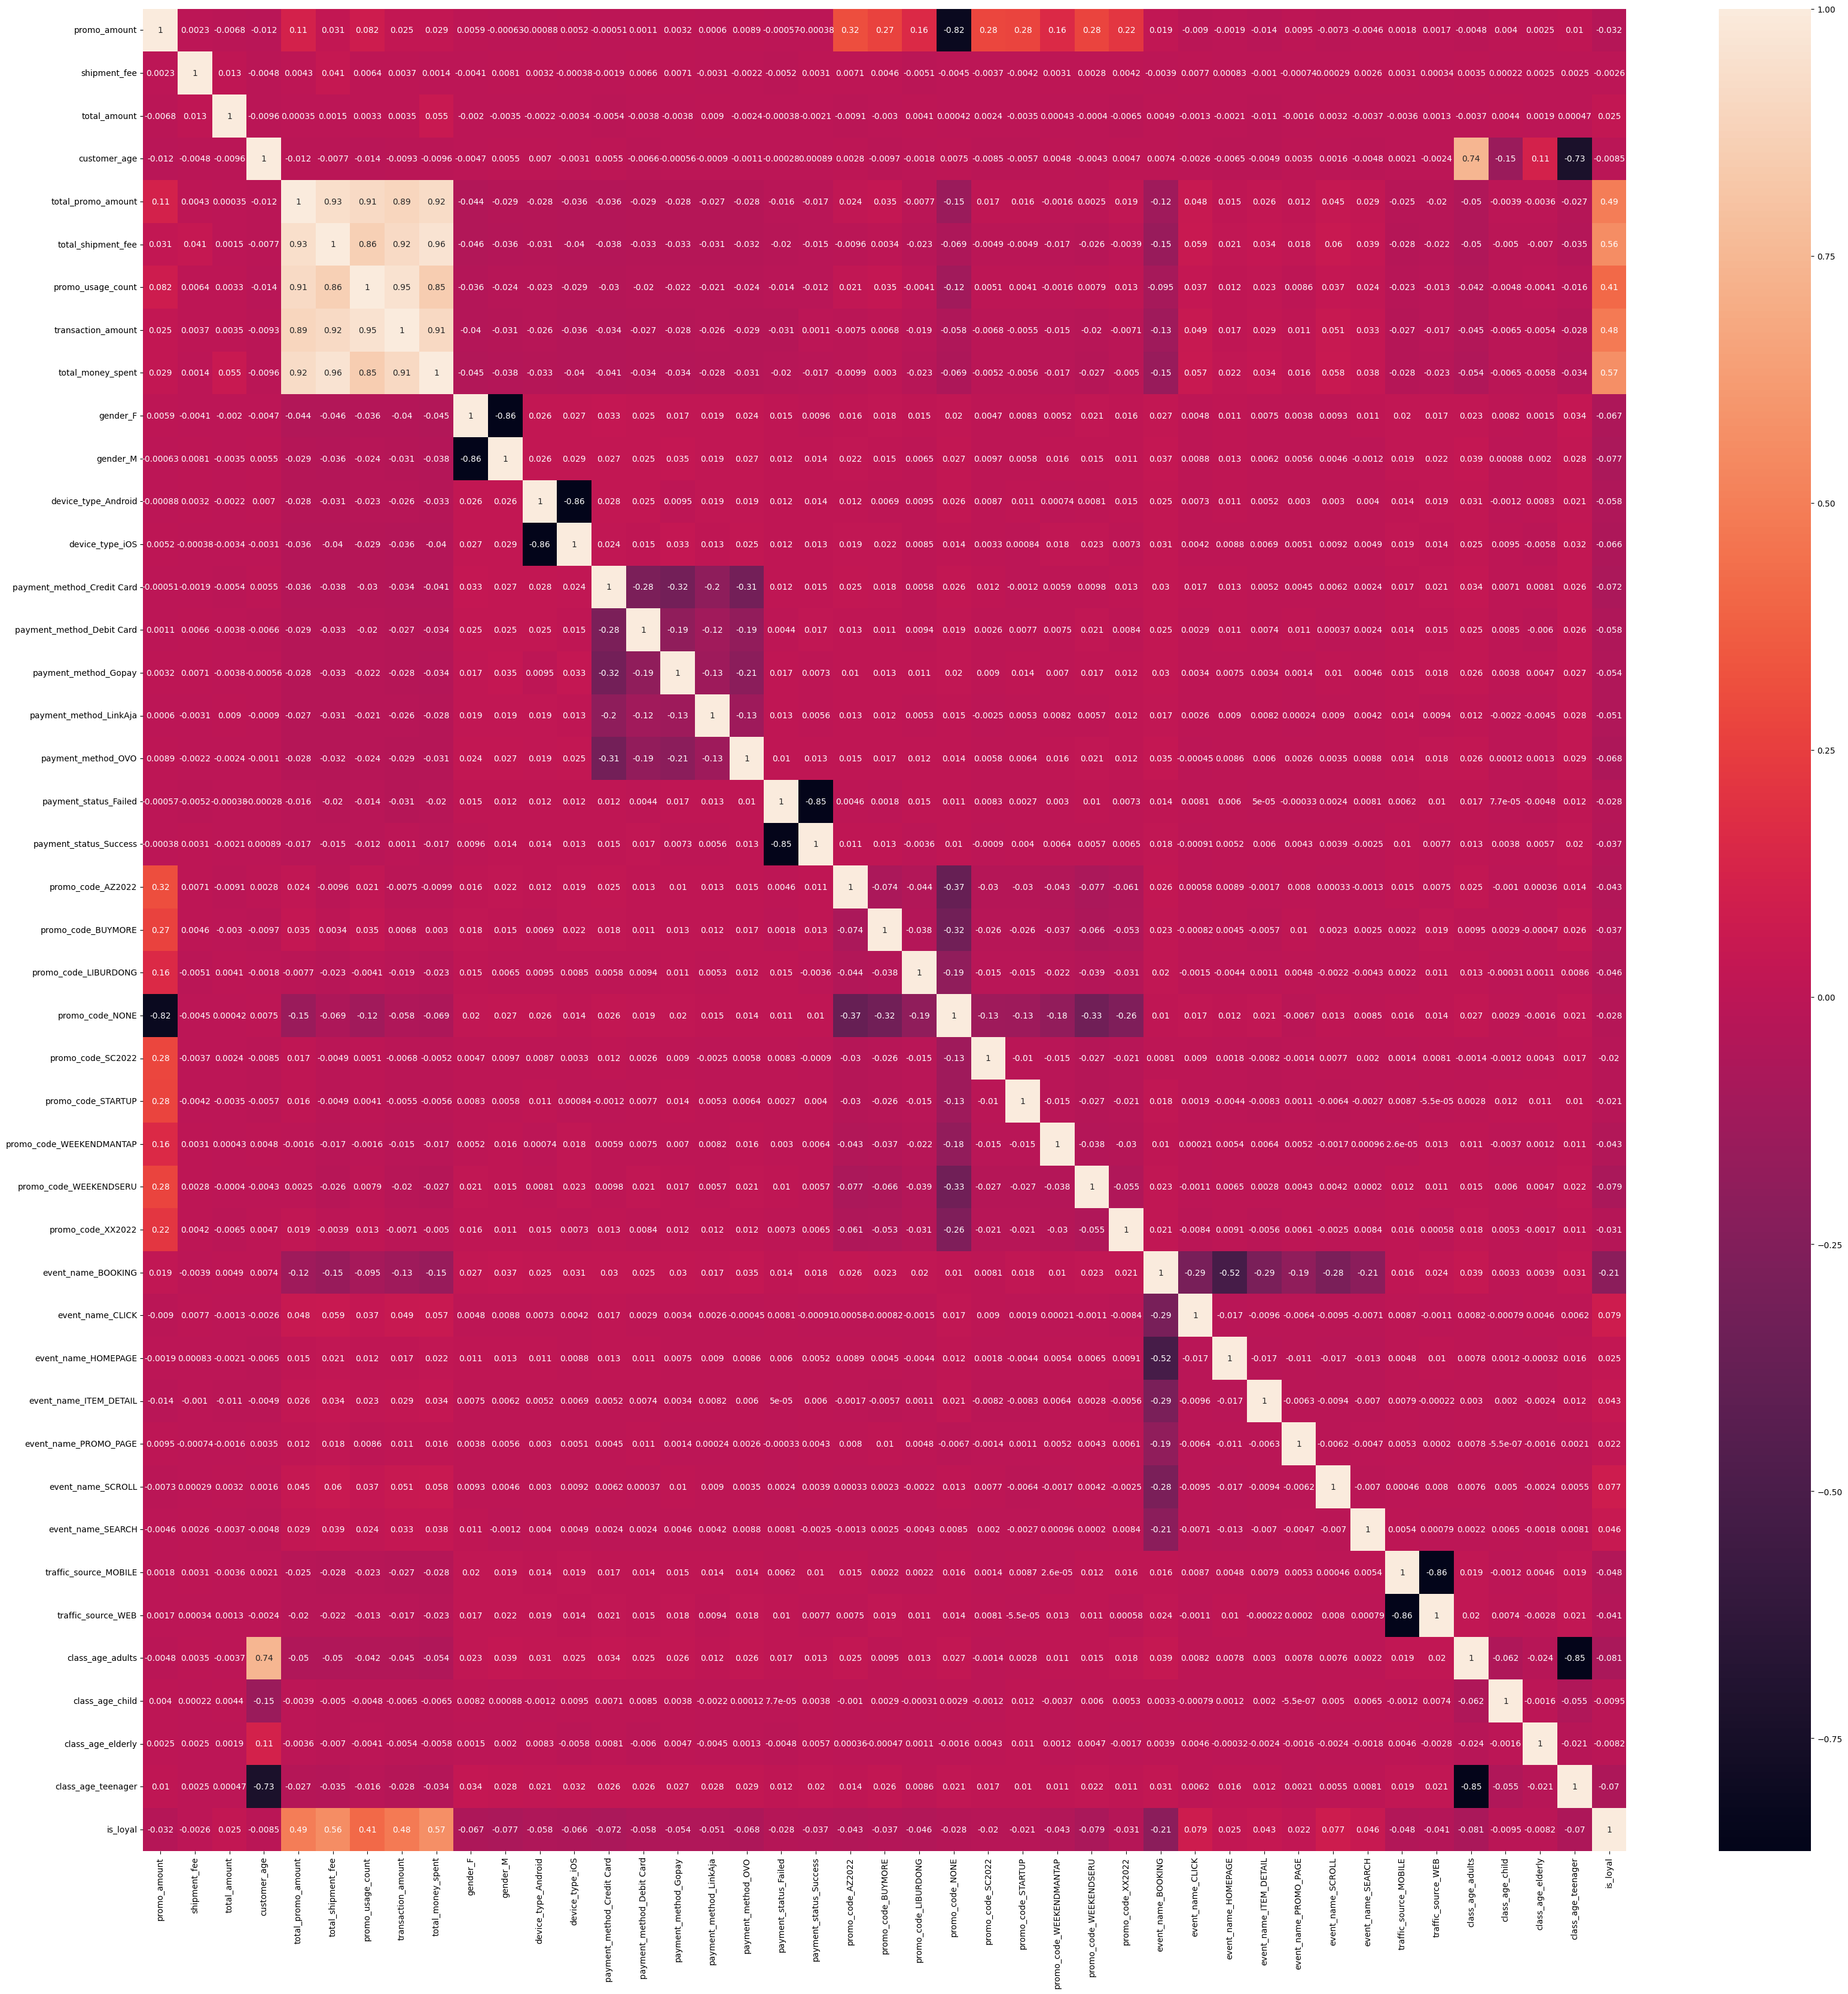

In [ ]:
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(df_final.corr(), annot=True)
plt.show()

In [ ]:
# memilih feature
df_da = df_final[['payment_status_Success', 'total_shipment_fee', 'transaction_amount',
                  'traffic_source_MOBILE', 'customer_age', 'event_name_BOOKING', 'promo_usage_count',
                  'total_money_spent', 'total_promo_amount', 'device_type_Android', 'promo_code_NONE',
                  'gender_F', 'class_age_adults', 'payment_method_Credit Card','promo_amount',
                   'is_loyal'
                       ]]

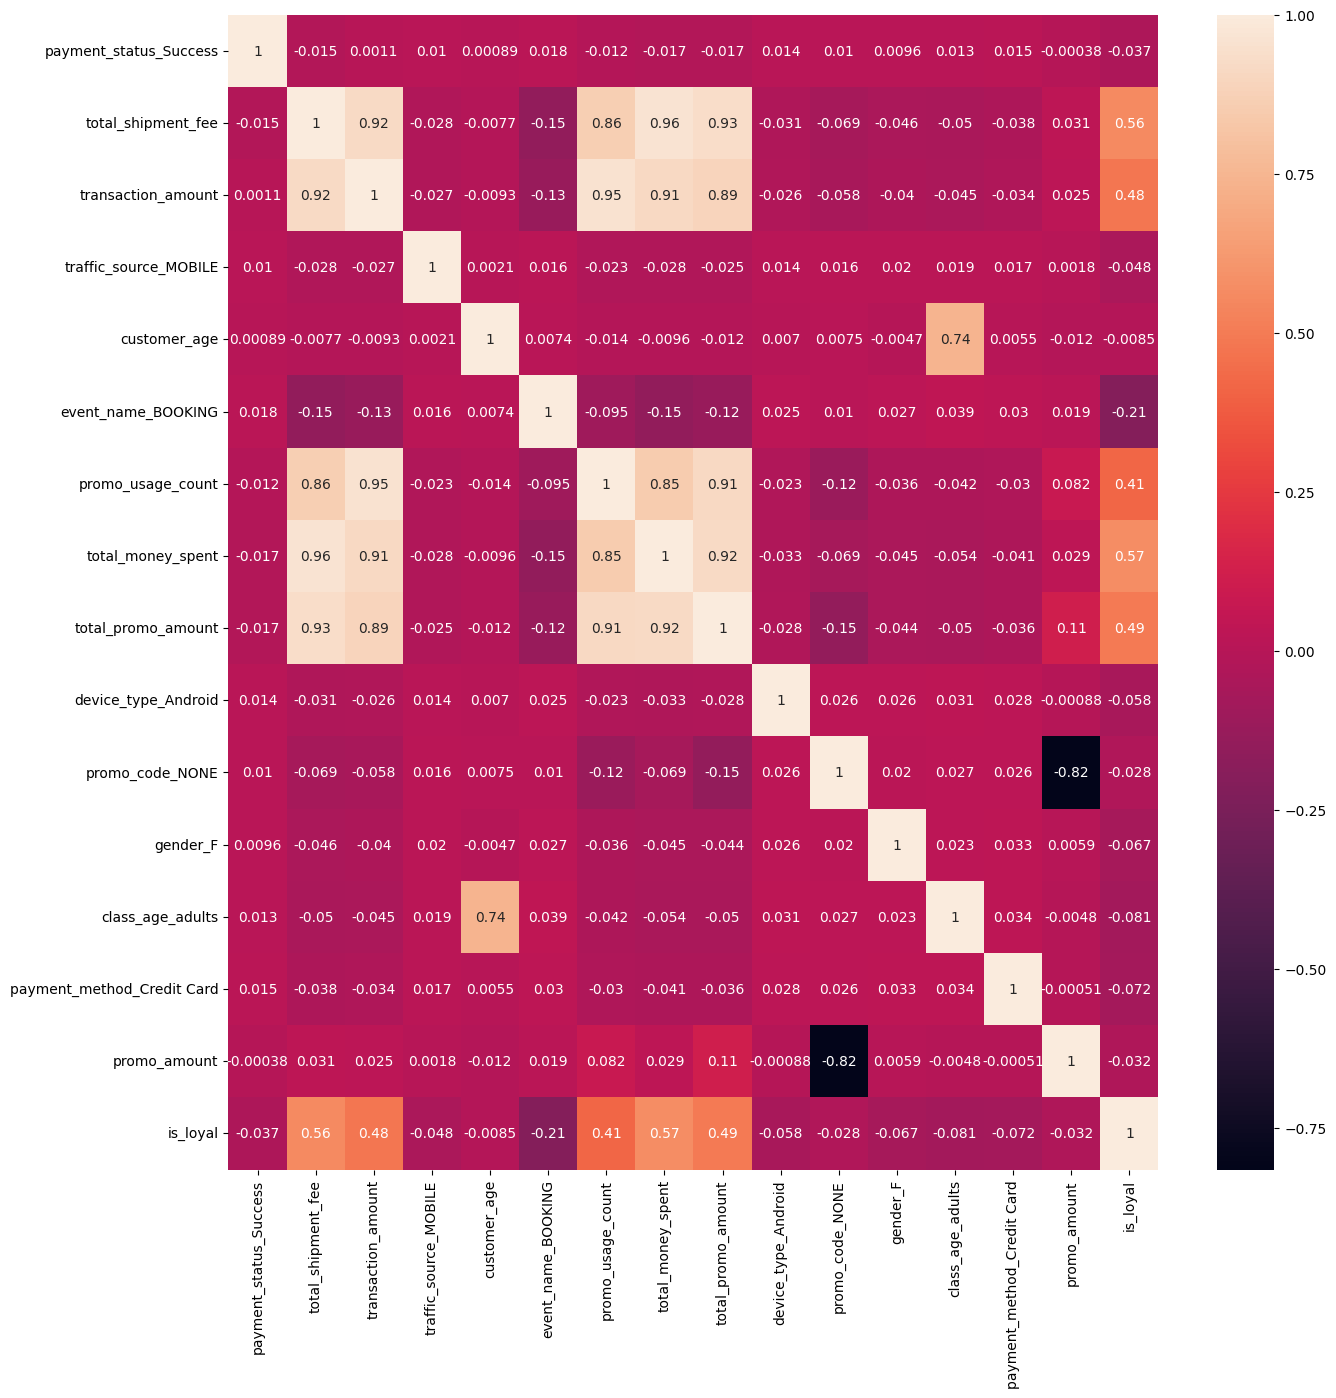

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_da.corr(), annot=True)
plt.show()

In [ ]:
# memisahkan variable input dan target
X = df_da.drop(['is_loyal'], axis=1)
y = df_da['is_loyal']

In [ ]:
# feature selection by VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

model_variables = X.columns
vif_values = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'Variable': model_variables, 'VIF': vif_values})
vif.sort_values('VIF', ascending=False).reset_index(drop=True)

,Variable,VIF
0,total_shipment_fee,34.415296
1,transaction_amount,34.200631
2,promo_usage_count,27.373124
3,total_promo_amount,25.243992
4,total_money_spent,23.908626
5,customer_age,22.921978
6,payment_status_Success,14.936002
7,event_name_BOOKING,8.849991
8,traffic_source_MOBILE,7.909779
9,promo_code_NONE,6.971337


In [ ]:
# feature selection by Chi-Squared
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features','Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by='Score',ascending=False)
'''

"\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import chi2\n\nbestfeatures = SelectKBest(score_func=chi2, k=6)\nfit = bestfeatures.fit(X,y)\ndfscores = pd.DataFrame(fit.scores_)\ndfcolumns = pd.DataFrame(X.columns)\nfeatureScores = pd.concat([dfcolumns, dfscores], axis=1)\nfeatureScores.columns = ['Features','Score']\nprint('The features that correlate well with target feature:\n')\nfeatureScores.sort_values(by='Score',ascending=False)\n"

# Baseline Model

In [ ]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# split train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
# Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Cross Validation
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [ ]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
             LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
             RandomForestClassifier,
             GradientBoostingClassifier,
             ExtraTreesClassifier,
             XGBClassifier,
             CatBoostClassifier]

model_name = ['DecisionTreeClassifier',
              'LogisticRegression',
              'KNeighborsClassifier',
              'GaussianNB',
              'RandomForestClassifier',
              'GradientBoostingClassifier',
              'ExtraTreesClassifier',
              'XGBClassifier',
              'CatBoostClassifier']

## loop for all model
datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y):
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        nfold += 1
    
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

Learning rate set to 0.053618
0:	learn: 0.6111674	total: 157ms	remaining: 2m 36s
1:	learn: 0.5750841	total: 169ms	remaining: 1m 24s
2:	learn: 0.5298132	total: 182ms	remaining: 1m
3:	learn: 0.4978294	total: 193ms	remaining: 48s
4:	learn: 0.4587193	total: 204ms	remaining: 40.7s
5:	learn: 0.4376564	total: 221ms	remaining: 36.6s
6:	learn: 0.4118298	total: 236ms	remaining: 33.5s
7:	learn: 0.3917423	total: 249ms	remaining: 30.8s
8:	learn: 0.3794931	total: 261ms	remaining: 28.7s
9:	learn: 0.3704078	total: 272ms	remaining: 26.9s
10:	learn: 0.3635381	total: 284ms	remaining: 25.6s
11:	learn: 0.3571887	total: 295ms	remaining: 24.3s
12:	learn: 0.3506558	total: 309ms	remaining: 23.4s
13:	learn: 0.3460593	total: 321ms	remaining: 22.6s
14:	learn: 0.3385397	total: 332ms	remaining: 21.8s
15:	learn: 0.3322454	total: 344ms	remaining: 21.2s
16:	learn: 0.3280968	total: 355ms	remaining: 20.5s
17:	learn: 0.3253168	total: 366ms	remaining: 20s
18:	learn: 0.3221684	total: 379ms	remaining: 19.6s
19:	learn: 0.319

164:	learn: 0.2537440	total: 2.08s	remaining: 10.5s
165:	learn: 0.2536394	total: 2.09s	remaining: 10.5s
166:	learn: 0.2535332	total: 2.1s	remaining: 10.5s
167:	learn: 0.2534269	total: 2.11s	remaining: 10.4s
168:	learn: 0.2532359	total: 2.12s	remaining: 10.4s
169:	learn: 0.2531629	total: 2.13s	remaining: 10.4s
170:	learn: 0.2530874	total: 2.14s	remaining: 10.4s
171:	learn: 0.2529369	total: 2.15s	remaining: 10.4s
172:	learn: 0.2528496	total: 2.16s	remaining: 10.3s
173:	learn: 0.2526391	total: 2.17s	remaining: 10.3s
174:	learn: 0.2525457	total: 2.18s	remaining: 10.3s
175:	learn: 0.2524542	total: 2.19s	remaining: 10.3s
176:	learn: 0.2523355	total: 2.2s	remaining: 10.3s
177:	learn: 0.2521953	total: 2.21s	remaining: 10.2s
178:	learn: 0.2521006	total: 2.23s	remaining: 10.2s
179:	learn: 0.2520516	total: 2.24s	remaining: 10.2s
180:	learn: 0.2520274	total: 2.25s	remaining: 10.2s
181:	learn: 0.2519433	total: 2.26s	remaining: 10.2s
182:	learn: 0.2518571	total: 2.27s	remaining: 10.1s
183:	learn: 0.

333:	learn: 0.2396192	total: 3.94s	remaining: 7.85s
334:	learn: 0.2395291	total: 3.95s	remaining: 7.84s
335:	learn: 0.2394583	total: 3.96s	remaining: 7.83s
336:	learn: 0.2394065	total: 3.97s	remaining: 7.82s
337:	learn: 0.2393620	total: 3.98s	remaining: 7.8s
338:	learn: 0.2393144	total: 3.99s	remaining: 7.79s
339:	learn: 0.2392499	total: 4s	remaining: 7.77s
340:	learn: 0.2391240	total: 4.01s	remaining: 7.76s
341:	learn: 0.2390264	total: 4.03s	remaining: 7.75s
342:	learn: 0.2389909	total: 4.04s	remaining: 7.73s
343:	learn: 0.2389434	total: 4.05s	remaining: 7.72s
344:	learn: 0.2389059	total: 4.06s	remaining: 7.7s
345:	learn: 0.2388479	total: 4.07s	remaining: 7.69s
346:	learn: 0.2387434	total: 4.08s	remaining: 7.68s
347:	learn: 0.2386724	total: 4.09s	remaining: 7.66s
348:	learn: 0.2386099	total: 4.1s	remaining: 7.65s
349:	learn: 0.2385650	total: 4.11s	remaining: 7.64s
350:	learn: 0.2385141	total: 4.12s	remaining: 7.62s
351:	learn: 0.2384363	total: 4.13s	remaining: 7.61s
352:	learn: 0.2383

508:	learn: 0.2302538	total: 5.86s	remaining: 5.65s
509:	learn: 0.2301971	total: 5.87s	remaining: 5.64s
510:	learn: 0.2301469	total: 5.88s	remaining: 5.63s
511:	learn: 0.2301207	total: 5.89s	remaining: 5.62s
512:	learn: 0.2300745	total: 5.9s	remaining: 5.6s
513:	learn: 0.2300077	total: 5.92s	remaining: 5.59s
514:	learn: 0.2299371	total: 5.93s	remaining: 5.58s
515:	learn: 0.2299082	total: 5.94s	remaining: 5.57s
516:	learn: 0.2298750	total: 5.95s	remaining: 5.56s
517:	learn: 0.2298403	total: 5.96s	remaining: 5.54s
518:	learn: 0.2298147	total: 5.97s	remaining: 5.54s
519:	learn: 0.2297916	total: 5.98s	remaining: 5.52s
520:	learn: 0.2297546	total: 5.99s	remaining: 5.51s
521:	learn: 0.2297152	total: 6s	remaining: 5.5s
522:	learn: 0.2296443	total: 6.01s	remaining: 5.48s
523:	learn: 0.2295934	total: 6.02s	remaining: 5.47s
524:	learn: 0.2295707	total: 6.03s	remaining: 5.46s
525:	learn: 0.2295268	total: 6.05s	remaining: 5.45s
526:	learn: 0.2294974	total: 6.06s	remaining: 5.43s
527:	learn: 0.2294

680:	learn: 0.2231873	total: 7.73s	remaining: 3.62s
681:	learn: 0.2231596	total: 7.74s	remaining: 3.61s
682:	learn: 0.2231363	total: 7.75s	remaining: 3.6s
683:	learn: 0.2230849	total: 7.76s	remaining: 3.59s
684:	learn: 0.2230521	total: 7.77s	remaining: 3.58s
685:	learn: 0.2230222	total: 7.78s	remaining: 3.56s
686:	learn: 0.2229672	total: 7.79s	remaining: 3.55s
687:	learn: 0.2229318	total: 7.81s	remaining: 3.54s
688:	learn: 0.2228850	total: 7.82s	remaining: 3.53s
689:	learn: 0.2228490	total: 7.83s	remaining: 3.52s
690:	learn: 0.2228207	total: 7.84s	remaining: 3.5s
691:	learn: 0.2227652	total: 7.85s	remaining: 3.49s
692:	learn: 0.2227220	total: 7.86s	remaining: 3.48s
693:	learn: 0.2226657	total: 7.87s	remaining: 3.47s
694:	learn: 0.2226136	total: 7.88s	remaining: 3.46s
695:	learn: 0.2225588	total: 7.89s	remaining: 3.44s
696:	learn: 0.2225187	total: 7.9s	remaining: 3.43s
697:	learn: 0.2224879	total: 7.91s	remaining: 3.42s
698:	learn: 0.2224329	total: 7.92s	remaining: 3.41s
699:	learn: 0.2

855:	learn: 0.2163031	total: 9.61s	remaining: 1.62s
856:	learn: 0.2162460	total: 9.62s	remaining: 1.6s
857:	learn: 0.2162125	total: 9.63s	remaining: 1.59s
858:	learn: 0.2161754	total: 9.64s	remaining: 1.58s
859:	learn: 0.2161403	total: 9.65s	remaining: 1.57s
860:	learn: 0.2160926	total: 9.67s	remaining: 1.56s
861:	learn: 0.2160827	total: 9.68s	remaining: 1.55s
862:	learn: 0.2160375	total: 9.69s	remaining: 1.54s
863:	learn: 0.2159966	total: 9.7s	remaining: 1.53s
864:	learn: 0.2159508	total: 9.71s	remaining: 1.51s
865:	learn: 0.2159038	total: 9.72s	remaining: 1.5s
866:	learn: 0.2158548	total: 9.73s	remaining: 1.49s
867:	learn: 0.2157802	total: 9.74s	remaining: 1.48s
868:	learn: 0.2157408	total: 9.75s	remaining: 1.47s
869:	learn: 0.2156970	total: 9.76s	remaining: 1.46s
870:	learn: 0.2156718	total: 9.77s	remaining: 1.45s
871:	learn: 0.2156405	total: 9.78s	remaining: 1.44s
872:	learn: 0.2156227	total: 9.79s	remaining: 1.43s
873:	learn: 0.2155662	total: 9.8s	remaining: 1.41s
874:	learn: 0.21

19:	learn: 0.3217198	total: 254ms	remaining: 12.4s
20:	learn: 0.3164005	total: 269ms	remaining: 12.5s
21:	learn: 0.3135210	total: 285ms	remaining: 12.7s
22:	learn: 0.3101115	total: 298ms	remaining: 12.7s
23:	learn: 0.3069502	total: 313ms	remaining: 12.7s
24:	learn: 0.3050763	total: 325ms	remaining: 12.7s
25:	learn: 0.3034036	total: 337ms	remaining: 12.6s
26:	learn: 0.3014159	total: 351ms	remaining: 12.7s
27:	learn: 0.3001079	total: 364ms	remaining: 12.6s
28:	learn: 0.2986006	total: 378ms	remaining: 12.6s
29:	learn: 0.2973493	total: 389ms	remaining: 12.6s
30:	learn: 0.2952988	total: 400ms	remaining: 12.5s
31:	learn: 0.2942158	total: 414ms	remaining: 12.5s
32:	learn: 0.2928967	total: 427ms	remaining: 12.5s
33:	learn: 0.2920425	total: 444ms	remaining: 12.6s
34:	learn: 0.2908145	total: 456ms	remaining: 12.6s
35:	learn: 0.2899854	total: 469ms	remaining: 12.6s
36:	learn: 0.2889095	total: 486ms	remaining: 12.6s
37:	learn: 0.2876883	total: 499ms	remaining: 12.6s
38:	learn: 0.2870406	total: 513

181:	learn: 0.2532495	total: 2.39s	remaining: 10.7s
182:	learn: 0.2532003	total: 2.4s	remaining: 10.7s
183:	learn: 0.2531347	total: 2.41s	remaining: 10.7s
184:	learn: 0.2530470	total: 2.42s	remaining: 10.7s
185:	learn: 0.2529578	total: 2.44s	remaining: 10.7s
186:	learn: 0.2528301	total: 2.45s	remaining: 10.7s
187:	learn: 0.2527615	total: 2.46s	remaining: 10.6s
188:	learn: 0.2526462	total: 2.48s	remaining: 10.6s
189:	learn: 0.2525519	total: 2.49s	remaining: 10.6s
190:	learn: 0.2524878	total: 2.5s	remaining: 10.6s
191:	learn: 0.2523907	total: 2.52s	remaining: 10.6s
192:	learn: 0.2522949	total: 2.53s	remaining: 10.6s
193:	learn: 0.2522025	total: 2.54s	remaining: 10.6s
194:	learn: 0.2520147	total: 2.55s	remaining: 10.5s
195:	learn: 0.2519550	total: 2.56s	remaining: 10.5s
196:	learn: 0.2518552	total: 2.58s	remaining: 10.5s
197:	learn: 0.2517287	total: 2.59s	remaining: 10.5s
198:	learn: 0.2516844	total: 2.6s	remaining: 10.5s
199:	learn: 0.2514872	total: 2.62s	remaining: 10.5s
200:	learn: 0.2

347:	learn: 0.2389986	total: 4.52s	remaining: 8.46s
348:	learn: 0.2389339	total: 4.53s	remaining: 8.45s
349:	learn: 0.2388784	total: 4.54s	remaining: 8.44s
350:	learn: 0.2388183	total: 4.56s	remaining: 8.43s
351:	learn: 0.2387761	total: 4.57s	remaining: 8.41s
352:	learn: 0.2387300	total: 4.58s	remaining: 8.4s
353:	learn: 0.2386869	total: 4.59s	remaining: 8.38s
354:	learn: 0.2385963	total: 4.61s	remaining: 8.37s
355:	learn: 0.2384815	total: 4.62s	remaining: 8.36s
356:	learn: 0.2384343	total: 4.63s	remaining: 8.34s
357:	learn: 0.2383876	total: 4.64s	remaining: 8.33s
358:	learn: 0.2383601	total: 4.66s	remaining: 8.31s
359:	learn: 0.2383082	total: 4.67s	remaining: 8.3s
360:	learn: 0.2382680	total: 4.68s	remaining: 8.29s
361:	learn: 0.2382063	total: 4.7s	remaining: 8.28s
362:	learn: 0.2381304	total: 4.71s	remaining: 8.26s
363:	learn: 0.2379908	total: 4.72s	remaining: 8.25s
364:	learn: 0.2379280	total: 4.73s	remaining: 8.24s
365:	learn: 0.2378294	total: 4.75s	remaining: 8.22s
366:	learn: 0.2

513:	learn: 0.2310438	total: 6.63s	remaining: 6.27s
514:	learn: 0.2310113	total: 6.64s	remaining: 6.26s
515:	learn: 0.2309595	total: 6.66s	remaining: 6.24s
516:	learn: 0.2309153	total: 6.67s	remaining: 6.23s
517:	learn: 0.2308507	total: 6.68s	remaining: 6.22s
518:	learn: 0.2308203	total: 6.69s	remaining: 6.2s
519:	learn: 0.2308076	total: 6.7s	remaining: 6.19s
520:	learn: 0.2307772	total: 6.71s	remaining: 6.17s
521:	learn: 0.2307326	total: 6.73s	remaining: 6.16s
522:	learn: 0.2306794	total: 6.74s	remaining: 6.15s
523:	learn: 0.2306470	total: 6.75s	remaining: 6.13s
524:	learn: 0.2305963	total: 6.76s	remaining: 6.12s
525:	learn: 0.2305598	total: 6.78s	remaining: 6.11s
526:	learn: 0.2305097	total: 6.79s	remaining: 6.09s
527:	learn: 0.2305054	total: 6.8s	remaining: 6.08s
528:	learn: 0.2304544	total: 6.81s	remaining: 6.07s
529:	learn: 0.2304216	total: 6.82s	remaining: 6.05s
530:	learn: 0.2303836	total: 6.83s	remaining: 6.04s
531:	learn: 0.2303417	total: 6.85s	remaining: 6.03s
532:	learn: 0.2

688:	learn: 0.2234813	total: 8.77s	remaining: 3.96s
689:	learn: 0.2234465	total: 8.79s	remaining: 3.95s
690:	learn: 0.2234155	total: 8.8s	remaining: 3.94s
691:	learn: 0.2233646	total: 8.81s	remaining: 3.92s
692:	learn: 0.2233351	total: 8.82s	remaining: 3.91s
693:	learn: 0.2233031	total: 8.84s	remaining: 3.9s
694:	learn: 0.2232797	total: 8.85s	remaining: 3.88s
695:	learn: 0.2232433	total: 8.86s	remaining: 3.87s
696:	learn: 0.2231961	total: 8.87s	remaining: 3.86s
697:	learn: 0.2231241	total: 8.89s	remaining: 3.85s
698:	learn: 0.2230912	total: 8.9s	remaining: 3.83s
699:	learn: 0.2230268	total: 8.91s	remaining: 3.82s
700:	learn: 0.2230055	total: 8.92s	remaining: 3.81s
701:	learn: 0.2229559	total: 8.94s	remaining: 3.79s
702:	learn: 0.2228934	total: 8.95s	remaining: 3.78s
703:	learn: 0.2228458	total: 8.96s	remaining: 3.77s
704:	learn: 0.2227911	total: 8.97s	remaining: 3.75s
705:	learn: 0.2227386	total: 8.98s	remaining: 3.74s
706:	learn: 0.2227056	total: 9s	remaining: 3.73s
707:	learn: 0.2226

863:	learn: 0.2169034	total: 10.9s	remaining: 1.72s
864:	learn: 0.2168741	total: 10.9s	remaining: 1.7s
865:	learn: 0.2168279	total: 10.9s	remaining: 1.69s
866:	learn: 0.2168007	total: 10.9s	remaining: 1.68s
867:	learn: 0.2167800	total: 11s	remaining: 1.67s
868:	learn: 0.2167395	total: 11s	remaining: 1.65s
869:	learn: 0.2167164	total: 11s	remaining: 1.64s
870:	learn: 0.2166648	total: 11s	remaining: 1.63s
871:	learn: 0.2166218	total: 11s	remaining: 1.61s
872:	learn: 0.2165774	total: 11s	remaining: 1.6s
873:	learn: 0.2165473	total: 11s	remaining: 1.59s
874:	learn: 0.2164951	total: 11s	remaining: 1.58s
875:	learn: 0.2164636	total: 11.1s	remaining: 1.56s
876:	learn: 0.2164307	total: 11.1s	remaining: 1.55s
877:	learn: 0.2164025	total: 11.1s	remaining: 1.54s
878:	learn: 0.2163725	total: 11.1s	remaining: 1.53s
879:	learn: 0.2163082	total: 11.1s	remaining: 1.51s
880:	learn: 0.2162832	total: 11.1s	remaining: 1.5s
881:	learn: 0.2162368	total: 11.1s	remaining: 1.49s
882:	learn: 0.2161807	total: 11

31:	learn: 0.2922183	total: 410ms	remaining: 12.4s
32:	learn: 0.2904386	total: 424ms	remaining: 12.4s
33:	learn: 0.2893824	total: 436ms	remaining: 12.4s
34:	learn: 0.2879898	total: 450ms	remaining: 12.4s
35:	learn: 0.2867365	total: 462ms	remaining: 12.4s
36:	learn: 0.2859397	total: 474ms	remaining: 12.3s
37:	learn: 0.2850465	total: 488ms	remaining: 12.4s
38:	learn: 0.2844199	total: 499ms	remaining: 12.3s
39:	learn: 0.2835978	total: 511ms	remaining: 12.3s
40:	learn: 0.2829894	total: 524ms	remaining: 12.3s
41:	learn: 0.2824879	total: 536ms	remaining: 12.2s
42:	learn: 0.2817357	total: 549ms	remaining: 12.2s
43:	learn: 0.2804701	total: 560ms	remaining: 12.2s
44:	learn: 0.2798795	total: 571ms	remaining: 12.1s
45:	learn: 0.2791700	total: 586ms	remaining: 12.2s
46:	learn: 0.2787751	total: 600ms	remaining: 12.2s
47:	learn: 0.2783828	total: 614ms	remaining: 12.2s
48:	learn: 0.2778529	total: 628ms	remaining: 12.2s
49:	learn: 0.2773669	total: 641ms	remaining: 12.2s
50:	learn: 0.2769076	total: 655

207:	learn: 0.2506159	total: 2.69s	remaining: 10.3s
208:	learn: 0.2504567	total: 2.71s	remaining: 10.2s
209:	learn: 0.2503431	total: 2.72s	remaining: 10.2s
210:	learn: 0.2502518	total: 2.73s	remaining: 10.2s
211:	learn: 0.2501838	total: 2.74s	remaining: 10.2s
212:	learn: 0.2501238	total: 2.76s	remaining: 10.2s
213:	learn: 0.2500153	total: 2.77s	remaining: 10.2s
214:	learn: 0.2499324	total: 2.78s	remaining: 10.2s
215:	learn: 0.2498386	total: 2.79s	remaining: 10.1s
216:	learn: 0.2497965	total: 2.81s	remaining: 10.1s
217:	learn: 0.2497469	total: 2.82s	remaining: 10.1s
218:	learn: 0.2496718	total: 2.83s	remaining: 10.1s
219:	learn: 0.2496142	total: 2.84s	remaining: 10.1s
220:	learn: 0.2495397	total: 2.85s	remaining: 10.1s
221:	learn: 0.2494243	total: 2.87s	remaining: 10.1s
222:	learn: 0.2492802	total: 2.88s	remaining: 10s
223:	learn: 0.2491778	total: 2.89s	remaining: 10s
224:	learn: 0.2487960	total: 2.9s	remaining: 10s
225:	learn: 0.2487419	total: 2.92s	remaining: 10s
226:	learn: 0.2486985

376:	learn: 0.2376461	total: 4.81s	remaining: 7.95s
377:	learn: 0.2375968	total: 4.83s	remaining: 7.94s
378:	learn: 0.2375727	total: 4.84s	remaining: 7.92s
379:	learn: 0.2375411	total: 4.85s	remaining: 7.91s
380:	learn: 0.2373668	total: 4.86s	remaining: 7.9s
381:	learn: 0.2373121	total: 4.87s	remaining: 7.88s
382:	learn: 0.2372268	total: 4.88s	remaining: 7.87s
383:	learn: 0.2371296	total: 4.9s	remaining: 7.86s
384:	learn: 0.2370664	total: 4.91s	remaining: 7.84s
385:	learn: 0.2370146	total: 4.92s	remaining: 7.83s
386:	learn: 0.2369349	total: 4.93s	remaining: 7.81s
387:	learn: 0.2368697	total: 4.94s	remaining: 7.8s
388:	learn: 0.2368437	total: 4.96s	remaining: 7.79s
389:	learn: 0.2368008	total: 4.97s	remaining: 7.77s
390:	learn: 0.2367647	total: 4.98s	remaining: 7.76s
391:	learn: 0.2367093	total: 4.99s	remaining: 7.74s
392:	learn: 0.2366489	total: 5s	remaining: 7.73s
393:	learn: 0.2365891	total: 5.02s	remaining: 7.72s
394:	learn: 0.2365420	total: 5.03s	remaining: 7.7s
395:	learn: 0.23650

550:	learn: 0.2292845	total: 6.94s	remaining: 5.66s
551:	learn: 0.2292452	total: 6.96s	remaining: 5.65s
552:	learn: 0.2291849	total: 6.97s	remaining: 5.63s
553:	learn: 0.2291376	total: 6.98s	remaining: 5.62s
554:	learn: 0.2291025	total: 7s	remaining: 5.61s
555:	learn: 0.2290133	total: 7.01s	remaining: 5.6s
556:	learn: 0.2289716	total: 7.02s	remaining: 5.58s
557:	learn: 0.2289214	total: 7.03s	remaining: 5.57s
558:	learn: 0.2288937	total: 7.05s	remaining: 5.56s
559:	learn: 0.2288497	total: 7.06s	remaining: 5.55s
560:	learn: 0.2288094	total: 7.07s	remaining: 5.53s
561:	learn: 0.2287599	total: 7.08s	remaining: 5.52s
562:	learn: 0.2287265	total: 7.09s	remaining: 5.51s
563:	learn: 0.2286778	total: 7.11s	remaining: 5.5s
564:	learn: 0.2286468	total: 7.12s	remaining: 5.48s
565:	learn: 0.2286085	total: 7.13s	remaining: 5.47s
566:	learn: 0.2285712	total: 7.14s	remaining: 5.46s
567:	learn: 0.2285555	total: 7.16s	remaining: 5.44s
568:	learn: 0.2284999	total: 7.17s	remaining: 5.43s
569:	learn: 0.228

710:	learn: 0.2228900	total: 9.02s	remaining: 3.66s
711:	learn: 0.2228275	total: 9.03s	remaining: 3.65s
712:	learn: 0.2227810	total: 9.04s	remaining: 3.64s
713:	learn: 0.2227580	total: 9.06s	remaining: 3.63s
714:	learn: 0.2227420	total: 9.07s	remaining: 3.61s
715:	learn: 0.2227102	total: 9.08s	remaining: 3.6s
716:	learn: 0.2226880	total: 9.09s	remaining: 3.59s
717:	learn: 0.2226488	total: 9.1s	remaining: 3.58s
718:	learn: 0.2226063	total: 9.12s	remaining: 3.56s
719:	learn: 0.2225626	total: 9.13s	remaining: 3.55s
720:	learn: 0.2225350	total: 9.14s	remaining: 3.54s
721:	learn: 0.2225200	total: 9.15s	remaining: 3.52s
722:	learn: 0.2225135	total: 9.16s	remaining: 3.51s
723:	learn: 0.2224658	total: 9.18s	remaining: 3.5s
724:	learn: 0.2224161	total: 9.19s	remaining: 3.48s
725:	learn: 0.2223497	total: 9.2s	remaining: 3.47s
726:	learn: 0.2222806	total: 9.21s	remaining: 3.46s
727:	learn: 0.2222494	total: 9.23s	remaining: 3.45s
728:	learn: 0.2221896	total: 9.24s	remaining: 3.44s
729:	learn: 0.22

878:	learn: 0.2165001	total: 11.1s	remaining: 1.53s
879:	learn: 0.2164658	total: 11.1s	remaining: 1.52s
880:	learn: 0.2164302	total: 11.1s	remaining: 1.5s
881:	learn: 0.2164089	total: 11.1s	remaining: 1.49s
882:	learn: 0.2163546	total: 11.2s	remaining: 1.48s
883:	learn: 0.2163196	total: 11.2s	remaining: 1.47s
884:	learn: 0.2162939	total: 11.2s	remaining: 1.45s
885:	learn: 0.2162676	total: 11.2s	remaining: 1.44s
886:	learn: 0.2162242	total: 11.2s	remaining: 1.43s
887:	learn: 0.2162031	total: 11.2s	remaining: 1.41s
888:	learn: 0.2161489	total: 11.2s	remaining: 1.4s
889:	learn: 0.2161098	total: 11.2s	remaining: 1.39s
890:	learn: 0.2160507	total: 11.2s	remaining: 1.38s
891:	learn: 0.2160195	total: 11.3s	remaining: 1.36s
892:	learn: 0.2159623	total: 11.3s	remaining: 1.35s
893:	learn: 0.2159534	total: 11.3s	remaining: 1.34s
894:	learn: 0.2159190	total: 11.3s	remaining: 1.32s
895:	learn: 0.2158815	total: 11.3s	remaining: 1.31s
896:	learn: 0.2158415	total: 11.3s	remaining: 1.3s
897:	learn: 0.2

44:	learn: 0.2814052	total: 522ms	remaining: 11.1s
45:	learn: 0.2809209	total: 535ms	remaining: 11.1s
46:	learn: 0.2803135	total: 548ms	remaining: 11.1s
47:	learn: 0.2798026	total: 558ms	remaining: 11.1s
48:	learn: 0.2782464	total: 569ms	remaining: 11s
49:	learn: 0.2778874	total: 582ms	remaining: 11.1s
50:	learn: 0.2774786	total: 592ms	remaining: 11s
51:	learn: 0.2757720	total: 603ms	remaining: 11s
52:	learn: 0.2754757	total: 617ms	remaining: 11s
53:	learn: 0.2750334	total: 628ms	remaining: 11s
54:	learn: 0.2741795	total: 641ms	remaining: 11s
55:	learn: 0.2739181	total: 651ms	remaining: 11s
56:	learn: 0.2734731	total: 662ms	remaining: 11s
57:	learn: 0.2731338	total: 675ms	remaining: 11s
58:	learn: 0.2723004	total: 686ms	remaining: 10.9s
59:	learn: 0.2720082	total: 696ms	remaining: 10.9s
60:	learn: 0.2717094	total: 710ms	remaining: 10.9s
61:	learn: 0.2713293	total: 720ms	remaining: 10.9s
62:	learn: 0.2710388	total: 731ms	remaining: 10.9s
63:	learn: 0.2706914	total: 745ms	remaining: 10.9

209:	learn: 0.2501678	total: 2.45s	remaining: 9.23s
210:	learn: 0.2500301	total: 2.47s	remaining: 9.22s
211:	learn: 0.2499561	total: 2.48s	remaining: 9.21s
212:	learn: 0.2497858	total: 2.49s	remaining: 9.2s
213:	learn: 0.2497253	total: 2.5s	remaining: 9.19s
214:	learn: 0.2496315	total: 2.51s	remaining: 9.17s
215:	learn: 0.2495409	total: 2.52s	remaining: 9.17s
216:	learn: 0.2494586	total: 2.54s	remaining: 9.15s
217:	learn: 0.2493880	total: 2.55s	remaining: 9.14s
218:	learn: 0.2492924	total: 2.56s	remaining: 9.13s
219:	learn: 0.2491893	total: 2.57s	remaining: 9.12s
220:	learn: 0.2490664	total: 2.58s	remaining: 9.1s
221:	learn: 0.2489911	total: 2.59s	remaining: 9.09s
222:	learn: 0.2488955	total: 2.6s	remaining: 9.08s
223:	learn: 0.2488107	total: 2.62s	remaining: 9.07s
224:	learn: 0.2484806	total: 2.63s	remaining: 9.06s
225:	learn: 0.2483869	total: 2.64s	remaining: 9.04s
226:	learn: 0.2483172	total: 2.65s	remaining: 9.03s
227:	learn: 0.2482602	total: 2.66s	remaining: 9.02s
228:	learn: 0.24

374:	learn: 0.2375777	total: 4.37s	remaining: 7.28s
375:	learn: 0.2375232	total: 4.38s	remaining: 7.27s
376:	learn: 0.2375064	total: 4.39s	remaining: 7.26s
377:	learn: 0.2374739	total: 4.4s	remaining: 7.24s
378:	learn: 0.2374147	total: 4.41s	remaining: 7.23s
379:	learn: 0.2373571	total: 4.42s	remaining: 7.22s
380:	learn: 0.2373128	total: 4.43s	remaining: 7.2s
381:	learn: 0.2372727	total: 4.45s	remaining: 7.19s
382:	learn: 0.2372189	total: 4.46s	remaining: 7.18s
383:	learn: 0.2371700	total: 4.47s	remaining: 7.17s
384:	learn: 0.2371021	total: 4.48s	remaining: 7.15s
385:	learn: 0.2370533	total: 4.49s	remaining: 7.14s
386:	learn: 0.2370182	total: 4.5s	remaining: 7.13s
387:	learn: 0.2369896	total: 4.51s	remaining: 7.12s
388:	learn: 0.2369236	total: 4.52s	remaining: 7.11s
389:	learn: 0.2369003	total: 4.53s	remaining: 7.09s
390:	learn: 0.2368239	total: 4.54s	remaining: 7.08s
391:	learn: 0.2367534	total: 4.56s	remaining: 7.07s
392:	learn: 0.2366944	total: 4.57s	remaining: 7.05s
393:	learn: 0.2

540:	learn: 0.2301570	total: 6.27s	remaining: 5.32s
541:	learn: 0.2301262	total: 6.28s	remaining: 5.31s
542:	learn: 0.2300502	total: 6.29s	remaining: 5.3s
543:	learn: 0.2299889	total: 6.3s	remaining: 5.29s
544:	learn: 0.2299593	total: 6.32s	remaining: 5.27s
545:	learn: 0.2298983	total: 6.33s	remaining: 5.26s
546:	learn: 0.2298690	total: 6.34s	remaining: 5.25s
547:	learn: 0.2298247	total: 6.35s	remaining: 5.24s
548:	learn: 0.2297654	total: 6.36s	remaining: 5.23s
549:	learn: 0.2297250	total: 6.37s	remaining: 5.21s
550:	learn: 0.2296511	total: 6.38s	remaining: 5.2s
551:	learn: 0.2296234	total: 6.39s	remaining: 5.19s
552:	learn: 0.2295797	total: 6.41s	remaining: 5.18s
553:	learn: 0.2295524	total: 6.42s	remaining: 5.17s
554:	learn: 0.2294903	total: 6.43s	remaining: 5.15s
555:	learn: 0.2294712	total: 6.44s	remaining: 5.14s
556:	learn: 0.2294019	total: 6.45s	remaining: 5.13s
557:	learn: 0.2293421	total: 6.46s	remaining: 5.12s
558:	learn: 0.2293020	total: 6.47s	remaining: 5.11s
559:	learn: 0.2

703:	learn: 0.2236947	total: 8.17s	remaining: 3.44s
704:	learn: 0.2236601	total: 8.18s	remaining: 3.42s
705:	learn: 0.2236350	total: 8.19s	remaining: 3.41s
706:	learn: 0.2235916	total: 8.2s	remaining: 3.4s
707:	learn: 0.2235819	total: 8.21s	remaining: 3.39s
708:	learn: 0.2235201	total: 8.23s	remaining: 3.38s
709:	learn: 0.2234758	total: 8.24s	remaining: 3.36s
710:	learn: 0.2234255	total: 8.25s	remaining: 3.35s
711:	learn: 0.2233669	total: 8.26s	remaining: 3.34s
712:	learn: 0.2233059	total: 8.27s	remaining: 3.33s
713:	learn: 0.2232423	total: 8.28s	remaining: 3.32s
714:	learn: 0.2231895	total: 8.29s	remaining: 3.31s
715:	learn: 0.2231605	total: 8.31s	remaining: 3.29s
716:	learn: 0.2231299	total: 8.32s	remaining: 3.28s
717:	learn: 0.2230862	total: 8.33s	remaining: 3.27s
718:	learn: 0.2230576	total: 8.34s	remaining: 3.26s
719:	learn: 0.2230219	total: 8.35s	remaining: 3.25s
720:	learn: 0.2229824	total: 8.36s	remaining: 3.24s
721:	learn: 0.2229498	total: 8.38s	remaining: 3.23s
722:	learn: 0.

867:	learn: 0.2174757	total: 10s	remaining: 1.52s
868:	learn: 0.2174361	total: 10s	remaining: 1.51s
869:	learn: 0.2173978	total: 10s	remaining: 1.5s
870:	learn: 0.2173517	total: 10.1s	remaining: 1.49s
871:	learn: 0.2173110	total: 10.1s	remaining: 1.48s
872:	learn: 0.2172857	total: 10.1s	remaining: 1.47s
873:	learn: 0.2172357	total: 10.1s	remaining: 1.46s
874:	learn: 0.2172024	total: 10.1s	remaining: 1.44s
875:	learn: 0.2171813	total: 10.1s	remaining: 1.43s
876:	learn: 0.2171282	total: 10.1s	remaining: 1.42s
877:	learn: 0.2170808	total: 10.1s	remaining: 1.41s
878:	learn: 0.2170407	total: 10.1s	remaining: 1.4s
879:	learn: 0.2169856	total: 10.2s	remaining: 1.39s
880:	learn: 0.2169573	total: 10.2s	remaining: 1.37s
881:	learn: 0.2169209	total: 10.2s	remaining: 1.36s
882:	learn: 0.2168866	total: 10.2s	remaining: 1.35s
883:	learn: 0.2168532	total: 10.2s	remaining: 1.34s
884:	learn: 0.2168433	total: 10.2s	remaining: 1.33s
885:	learn: 0.2168182	total: 10.2s	remaining: 1.32s
886:	learn: 0.216782

40:	learn: 0.2836643	total: 505ms	remaining: 11.8s
41:	learn: 0.2829511	total: 517ms	remaining: 11.8s
42:	learn: 0.2823528	total: 531ms	remaining: 11.8s
43:	learn: 0.2809434	total: 542ms	remaining: 11.8s
44:	learn: 0.2798266	total: 554ms	remaining: 11.7s
45:	learn: 0.2790561	total: 567ms	remaining: 11.8s
46:	learn: 0.2781522	total: 577ms	remaining: 11.7s
47:	learn: 0.2773658	total: 590ms	remaining: 11.7s
48:	learn: 0.2767910	total: 603ms	remaining: 11.7s
49:	learn: 0.2763970	total: 613ms	remaining: 11.7s
50:	learn: 0.2759000	total: 625ms	remaining: 11.6s
51:	learn: 0.2749448	total: 639ms	remaining: 11.6s
52:	learn: 0.2742156	total: 650ms	remaining: 11.6s
53:	learn: 0.2731190	total: 662ms	remaining: 11.6s
54:	learn: 0.2728000	total: 674ms	remaining: 11.6s
55:	learn: 0.2725036	total: 686ms	remaining: 11.6s
56:	learn: 0.2719693	total: 700ms	remaining: 11.6s
57:	learn: 0.2717351	total: 711ms	remaining: 11.5s
58:	learn: 0.2714240	total: 724ms	remaining: 11.5s
59:	learn: 0.2711686	total: 737

215:	learn: 0.2492386	total: 2.63s	remaining: 9.55s
216:	learn: 0.2491842	total: 2.65s	remaining: 9.56s
217:	learn: 0.2490343	total: 2.66s	remaining: 9.54s
218:	learn: 0.2489156	total: 2.67s	remaining: 9.53s
219:	learn: 0.2488798	total: 2.68s	remaining: 9.52s
220:	learn: 0.2488012	total: 2.69s	remaining: 9.5s
221:	learn: 0.2487338	total: 2.71s	remaining: 9.5s
222:	learn: 0.2486793	total: 2.72s	remaining: 9.49s
223:	learn: 0.2486150	total: 2.73s	remaining: 9.47s
224:	learn: 0.2485544	total: 2.75s	remaining: 9.47s
225:	learn: 0.2484826	total: 2.76s	remaining: 9.46s
226:	learn: 0.2483661	total: 2.78s	remaining: 9.46s
227:	learn: 0.2482873	total: 2.79s	remaining: 9.44s
228:	learn: 0.2481504	total: 2.8s	remaining: 9.43s
229:	learn: 0.2480977	total: 2.81s	remaining: 9.42s
230:	learn: 0.2480419	total: 2.83s	remaining: 9.41s
231:	learn: 0.2480035	total: 2.84s	remaining: 9.4s
232:	learn: 0.2478700	total: 2.85s	remaining: 9.39s
233:	learn: 0.2477782	total: 2.86s	remaining: 9.37s
234:	learn: 0.24

374:	learn: 0.2373280	total: 4.56s	remaining: 7.59s
375:	learn: 0.2372650	total: 4.57s	remaining: 7.58s
376:	learn: 0.2372355	total: 4.58s	remaining: 7.57s
377:	learn: 0.2371998	total: 4.59s	remaining: 7.56s
378:	learn: 0.2371309	total: 4.6s	remaining: 7.54s
379:	learn: 0.2370609	total: 4.62s	remaining: 7.53s
380:	learn: 0.2370102	total: 4.63s	remaining: 7.51s
381:	learn: 0.2369828	total: 4.64s	remaining: 7.5s
382:	learn: 0.2369299	total: 4.65s	remaining: 7.49s
383:	learn: 0.2368993	total: 4.66s	remaining: 7.48s
384:	learn: 0.2368091	total: 4.67s	remaining: 7.47s
385:	learn: 0.2367471	total: 4.69s	remaining: 7.45s
386:	learn: 0.2366831	total: 4.7s	remaining: 7.44s
387:	learn: 0.2366095	total: 4.71s	remaining: 7.43s
388:	learn: 0.2365798	total: 4.72s	remaining: 7.42s
389:	learn: 0.2365565	total: 4.73s	remaining: 7.4s
390:	learn: 0.2364924	total: 4.74s	remaining: 7.39s
391:	learn: 0.2364428	total: 4.75s	remaining: 7.38s
392:	learn: 0.2363866	total: 4.76s	remaining: 7.36s
393:	learn: 0.23

548:	learn: 0.2288682	total: 6.66s	remaining: 5.47s
549:	learn: 0.2288253	total: 6.67s	remaining: 5.46s
550:	learn: 0.2287801	total: 6.68s	remaining: 5.45s
551:	learn: 0.2287297	total: 6.69s	remaining: 5.43s
552:	learn: 0.2287058	total: 6.71s	remaining: 5.42s
553:	learn: 0.2286627	total: 6.72s	remaining: 5.41s
554:	learn: 0.2286161	total: 6.73s	remaining: 5.39s
555:	learn: 0.2285832	total: 6.74s	remaining: 5.38s
556:	learn: 0.2285276	total: 6.75s	remaining: 5.37s
557:	learn: 0.2284743	total: 6.76s	remaining: 5.36s
558:	learn: 0.2284305	total: 6.77s	remaining: 5.34s
559:	learn: 0.2283916	total: 6.78s	remaining: 5.33s
560:	learn: 0.2283592	total: 6.8s	remaining: 5.32s
561:	learn: 0.2283206	total: 6.81s	remaining: 5.31s
562:	learn: 0.2282883	total: 6.82s	remaining: 5.29s
563:	learn: 0.2282349	total: 6.83s	remaining: 5.28s
564:	learn: 0.2281842	total: 6.84s	remaining: 5.27s
565:	learn: 0.2281143	total: 6.85s	remaining: 5.26s
566:	learn: 0.2280849	total: 6.87s	remaining: 5.24s
567:	learn: 0

723:	learn: 0.2216879	total: 8.76s	remaining: 3.34s
724:	learn: 0.2216304	total: 8.77s	remaining: 3.33s
725:	learn: 0.2215821	total: 8.79s	remaining: 3.31s
726:	learn: 0.2215344	total: 8.8s	remaining: 3.3s
727:	learn: 0.2214828	total: 8.81s	remaining: 3.29s
728:	learn: 0.2214568	total: 8.82s	remaining: 3.28s
729:	learn: 0.2214205	total: 8.84s	remaining: 3.27s
730:	learn: 0.2213884	total: 8.85s	remaining: 3.26s
731:	learn: 0.2213547	total: 8.86s	remaining: 3.25s
732:	learn: 0.2213171	total: 8.88s	remaining: 3.23s
733:	learn: 0.2212712	total: 8.89s	remaining: 3.22s
734:	learn: 0.2212194	total: 8.9s	remaining: 3.21s
735:	learn: 0.2211819	total: 8.91s	remaining: 3.2s
736:	learn: 0.2211447	total: 8.93s	remaining: 3.18s
737:	learn: 0.2211201	total: 8.94s	remaining: 3.17s
738:	learn: 0.2210849	total: 8.95s	remaining: 3.16s
739:	learn: 0.2210500	total: 8.96s	remaining: 3.15s
740:	learn: 0.2210225	total: 8.98s	remaining: 3.14s
741:	learn: 0.2210063	total: 8.99s	remaining: 3.12s
742:	learn: 0.22

899:	learn: 0.2150433	total: 10.9s	remaining: 1.21s
900:	learn: 0.2149961	total: 10.9s	remaining: 1.2s
901:	learn: 0.2149678	total: 10.9s	remaining: 1.19s
902:	learn: 0.2149305	total: 10.9s	remaining: 1.17s
903:	learn: 0.2148984	total: 10.9s	remaining: 1.16s
904:	learn: 0.2148729	total: 10.9s	remaining: 1.15s
905:	learn: 0.2148067	total: 11s	remaining: 1.14s
906:	learn: 0.2147638	total: 11s	remaining: 1.12s
907:	learn: 0.2147438	total: 11s	remaining: 1.11s
908:	learn: 0.2147138	total: 11s	remaining: 1.1s
909:	learn: 0.2146744	total: 11s	remaining: 1.09s
910:	learn: 0.2146304	total: 11s	remaining: 1.08s
911:	learn: 0.2145796	total: 11s	remaining: 1.06s
912:	learn: 0.2145480	total: 11s	remaining: 1.05s
913:	learn: 0.2145320	total: 11.1s	remaining: 1.04s
914:	learn: 0.2145265	total: 11.1s	remaining: 1.03s
915:	learn: 0.2145181	total: 11.1s	remaining: 1.01s
916:	learn: 0.2144983	total: 11.1s	remaining: 1s
917:	learn: 0.2144613	total: 11.1s	remaining: 992ms
918:	learn: 0.2144304	total: 11.1

In [ ]:
# compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test', ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
8,CatBoostClassifier,0.914038,0.896962,0.947962,0.840100,0.896962,1.707640e-02
7,XGBClassifier,0.918012,0.894643,0.942618,0.840503,0.894643,2.336925e-02
5,GradientBoostingClassifier,0.889602,0.887619,0.937048,0.831126,0.887619,1.982802e-03
4,RandomForestClassifier,0.999975,0.887350,0.928974,0.838890,0.887350,1.126244e-01
6,ExtraTreesClassifier,1.000000,0.875286,0.904429,0.839293,0.875286,1.247143e-01
0,DecisionTreeClassifier,1.000000,0.841091,0.836381,0.848131,0.841091,1.589091e-01
2,KNeighborsClassifier,0.885645,0.836100,0.860617,0.802191,0.836100,4.954466e-02
3,GaussianNB,0.829362,0.829362,0.929394,0.712898,0.829362,3.935839e-08
1,LogisticRegression,0.629012,0.628865,0.581038,0.924049,0.628865,1.469804e-04


# Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier()

In [ ]:
# set parameter
params = {'learning_rate':[0.01,0.05,0.1],
          'n_estimators':np.arange(100,500,100),
          'max_depth':[2,3,4,5,6,7]}

In [ ]:
# grid search of parameters, using 5 fold cross validation
gb_grid = GridSearchCV(model, params, cv=5, n_jobs=-1)

In [ ]:
# fit grid search model
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': array([100, 200, 300, 400])})

In [ ]:
# tampilkan parameter terbaik
print("Best Parameters:", gb_grid.best_params_)
print("Train Score:", gb_grid.best_score_)
print("Test Score:", gb_grid.score(X_test,y_test))
print('Precision:', precision_score(y_test, gb_grid.predict(X_test), average='macro'))
print('Recall:', recall_score(y_test, gb_grid.predict(X_test), average='macro'))
print('GAP:', gb_grid.best_score_ - gb_grid.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 400}
Train Score: 0.8634740600714135
Test Score: 0.8956477902873466
Precision: 0.8990564196452935
Recall: 0.8956477902873466
GAP: -0.03217373021593317


In [ ]:
# cek performa model di data test
y_pred_test_gb = gb_grid.predict(X_test)
print(classification_report(y_test, y_pred_test_gb))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5951
           1       0.94      0.85      0.89      5951

    accuracy                           0.90     11902
   macro avg       0.90      0.90      0.90     11902
weighted avg       0.90      0.90      0.90     11902



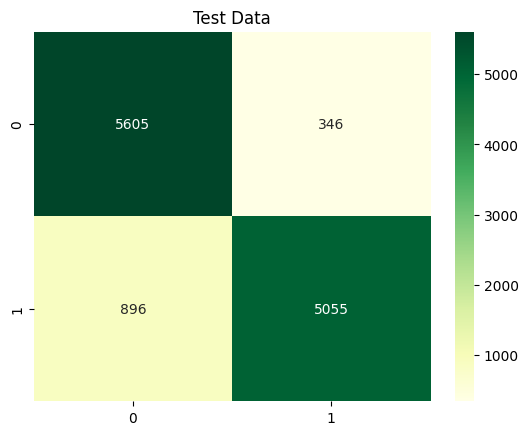

In [ ]:
from sklearn import metrics
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)

# plotting confusion matrix for the different models for the Testing Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_pred_test_gb)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Test Data');

# Comparing Algorithm

In [ ]:
# Untuned Gradient Boosting Classifier
model2 = GradientBoostingClassifier()

model2.fit(X_train, y_train)

y_pred_test_gb2 = model2.predict(X_test)
print(classification_report(y_test,y_pred_test_gb2))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      5951
           1       0.93      0.84      0.88      5951

    accuracy                           0.89     11902
   macro avg       0.89      0.89      0.89     11902
weighted avg       0.89      0.89      0.89     11902



In [ ]:
# Tuned Gradient Boosting Classifier
y_pred_test_gb = gb_grid.predict(X_test)
print(classification_report(y_test,y_pred_test_gb))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5951
           1       0.94      0.85      0.89      5951

    accuracy                           0.90     11902
   macro avg       0.90      0.90      0.90     11902
weighted avg       0.90      0.90      0.90     11902



# Feature Importance

In [ ]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import shap

# Fits the explainer
explainer = shap.Explainer(gb_grid.predict, X_test)

# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 11903it [37:52,  5.22it/s]                                                                      


In [ ]:
# Evaluate SHAP values

from scipy.special import softmax

def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

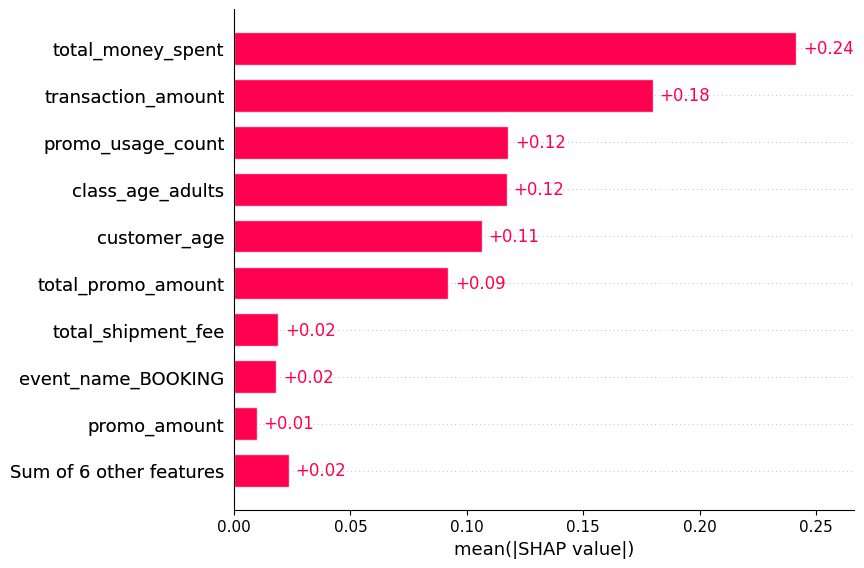

In [ ]:
shap.plots.bar(shap_values)